<a href="https://colab.research.google.com/github/saloniwalimbe/MF_Portfolio/blob/main/Project_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mutual Fund Portfolio Allocation and Optimisation

## Part - A

1. Calculating daily returns for mutual funds
2. Creating Factsheet
3. Calculating returns and factsheet for Index
4. Creating base portfolios
5. Assigning weights to portfolio
6. Calculating Portfolio - Risk, Return and Sharpe Ratio
7. Plotting the Efficient Frontier




Importing libraries

In [ ]:
import pandas as pd
import math
import datetime
from urllib.request import urlopen
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')     #suppress unwanted warnings

Daily NAV Values for all Mutual Fund Schemes - 2013-2022

Data taken from AMFI: https://www.amfiindia.com/net-asset-value/nav-history

Github csv file link:

In [ ]:
dailynav = 'https://raw.githubusercontent.com/saloniwalimbe/Mutual-Fund-Schemes/main/DailyNAV.csv'

Reading csv file, creating dataframe containing daily NAV values

In [ ]:

f = urlopen(dailynav)
data = f.read()
data = data.decode('utf-8')
data = data.split('\n')

list_for_df = []
for line in data[1:]:
  row = line.split(',')
  if row != '':
    list_for_df.append(row)

df = pd.DataFrame(list_for_df, columns= ['NAV_Date',
                                         'Axis_Equity','CanaraRobeco_Bluechip','Franklin_Bluechip','ICICI_FocusedEq','Kotak_Bluechip','Kotak_Flexicap','SBI_Bluechip','SBI_FocusedEq',
                                         'AdityaBirla_EqHybrid','Franklin_EqHybrid','HDFC_EqHybrid','SBI_EqHybrid',
                                         'Kotak_EqArbitrage','SBI_Arbitrage','LIC_Bond','LIC_DebtHybrid'
                                        ]
                 )


df['NAV_Date'] = pd.to_datetime(df['NAV_Date'], infer_datetime_format=True)
df['Axis_Equity'] = pd.to_numeric(df['Axis_Equity'])
df['CanaraRobeco_Bluechip'] = pd.to_numeric(df['CanaraRobeco_Bluechip'])
df['Franklin_Bluechip'] = pd.to_numeric(df['Franklin_Bluechip'])
df['ICICI_FocusedEq'] = pd.to_numeric(df['ICICI_FocusedEq'])
df['Kotak_Bluechip'] = pd.to_numeric(df['Kotak_Bluechip'])
df['Kotak_Flexicap'] = pd.to_numeric(df['Kotak_Flexicap'])
df['SBI_Bluechip'] = pd.to_numeric(df['SBI_Bluechip'], errors = "ignore")
df['SBI_FocusedEq'] = pd.to_numeric(df['SBI_FocusedEq'], errors = "ignore")
df['AdityaBirla_EqHybrid'] = pd.to_numeric(df['AdityaBirla_EqHybrid'], errors = "ignore")
df['Franklin_EqHybrid'] = pd.to_numeric(df['Franklin_EqHybrid'], errors = "ignore")
df['HDFC_EqHybrid'] = pd.to_numeric(df['HDFC_EqHybrid'], errors = "ignore")
df['SBI_EqHybrid'] = pd.to_numeric(df['SBI_EqHybrid'], errors = "ignore")
df['Kotak_EqArbitrage'] = pd.to_numeric(df['Kotak_EqArbitrage'], errors = "ignore")
df['SBI_Arbitrage'] = pd.to_numeric(df['SBI_Arbitrage'], errors = "ignore")
df['LIC_Bond'] = pd.to_numeric(df['LIC_Bond'], errors = "ignore")
df['LIC_DebtHybrid'] = pd.to_numeric(df['LIC_DebtHybrid'], errors = "ignore")


df = df.set_index('NAV_Date')

df = df.dropna()



In [ ]:
df

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
NAV_Date,,,,,,,,,,,,,,,,
2013-01-01,14.9149,12.02,238.3444,15.20,111.103,13.381,16.7200,61.4600,348.92,55.1533,28.957,56.7200,16.9361,15.6467,32.2502,35.2934
2013-01-02,15.0251,12.12,239.4819,15.33,111.730,13.478,16.8200,61.9100,350.97,55.2697,29.227,56.9600,16.9652,15.6730,32.2678,35.3290
2013-01-03,15.0732,12.14,240.4495,15.39,112.126,13.483,16.8500,62.4900,352.69,55.5012,29.316,57.5800,16.9610,15.6752,32.2970,35.3497
2013-01-04,15.0695,12.15,240.8853,15.41,112.697,13.488,16.8700,62.5000,353.10,55.5513,29.381,57.6600,16.9658,15.6725,32.3296,35.3660
2013-01-07,15.0370,12.11,240.7141,15.35,112.706,13.464,16.8000,62.3600,352.50,55.6576,29.348,57.7100,16.9742,15.6829,32.3619,35.3826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,65.3769,41.80,684.6072,51.24,375.727,53.636,63.6822,229.2696,1030.20,180.8508,84.005,207.4258,31.2420,28.1987,59.5256,68.6033
2022-12-23,64.0594,42.01,692.5938,51.94,380.901,54.517,62.5557,225.9170,1042.56,182.9713,85.226,204.5794,31.2474,28.2203,59.5629,68.3683
2022-12-26,64.8110,41.97,697.4250,52.29,383.312,55.078,63.4180,228.4033,1048.33,183.7410,85.640,206.7416,31.2668,28.2418,59.5702,68.5005


Before creating portfolios, visualising the performance of Mutual Fund

In [ ]:
import matplotlib.pyplot as plt

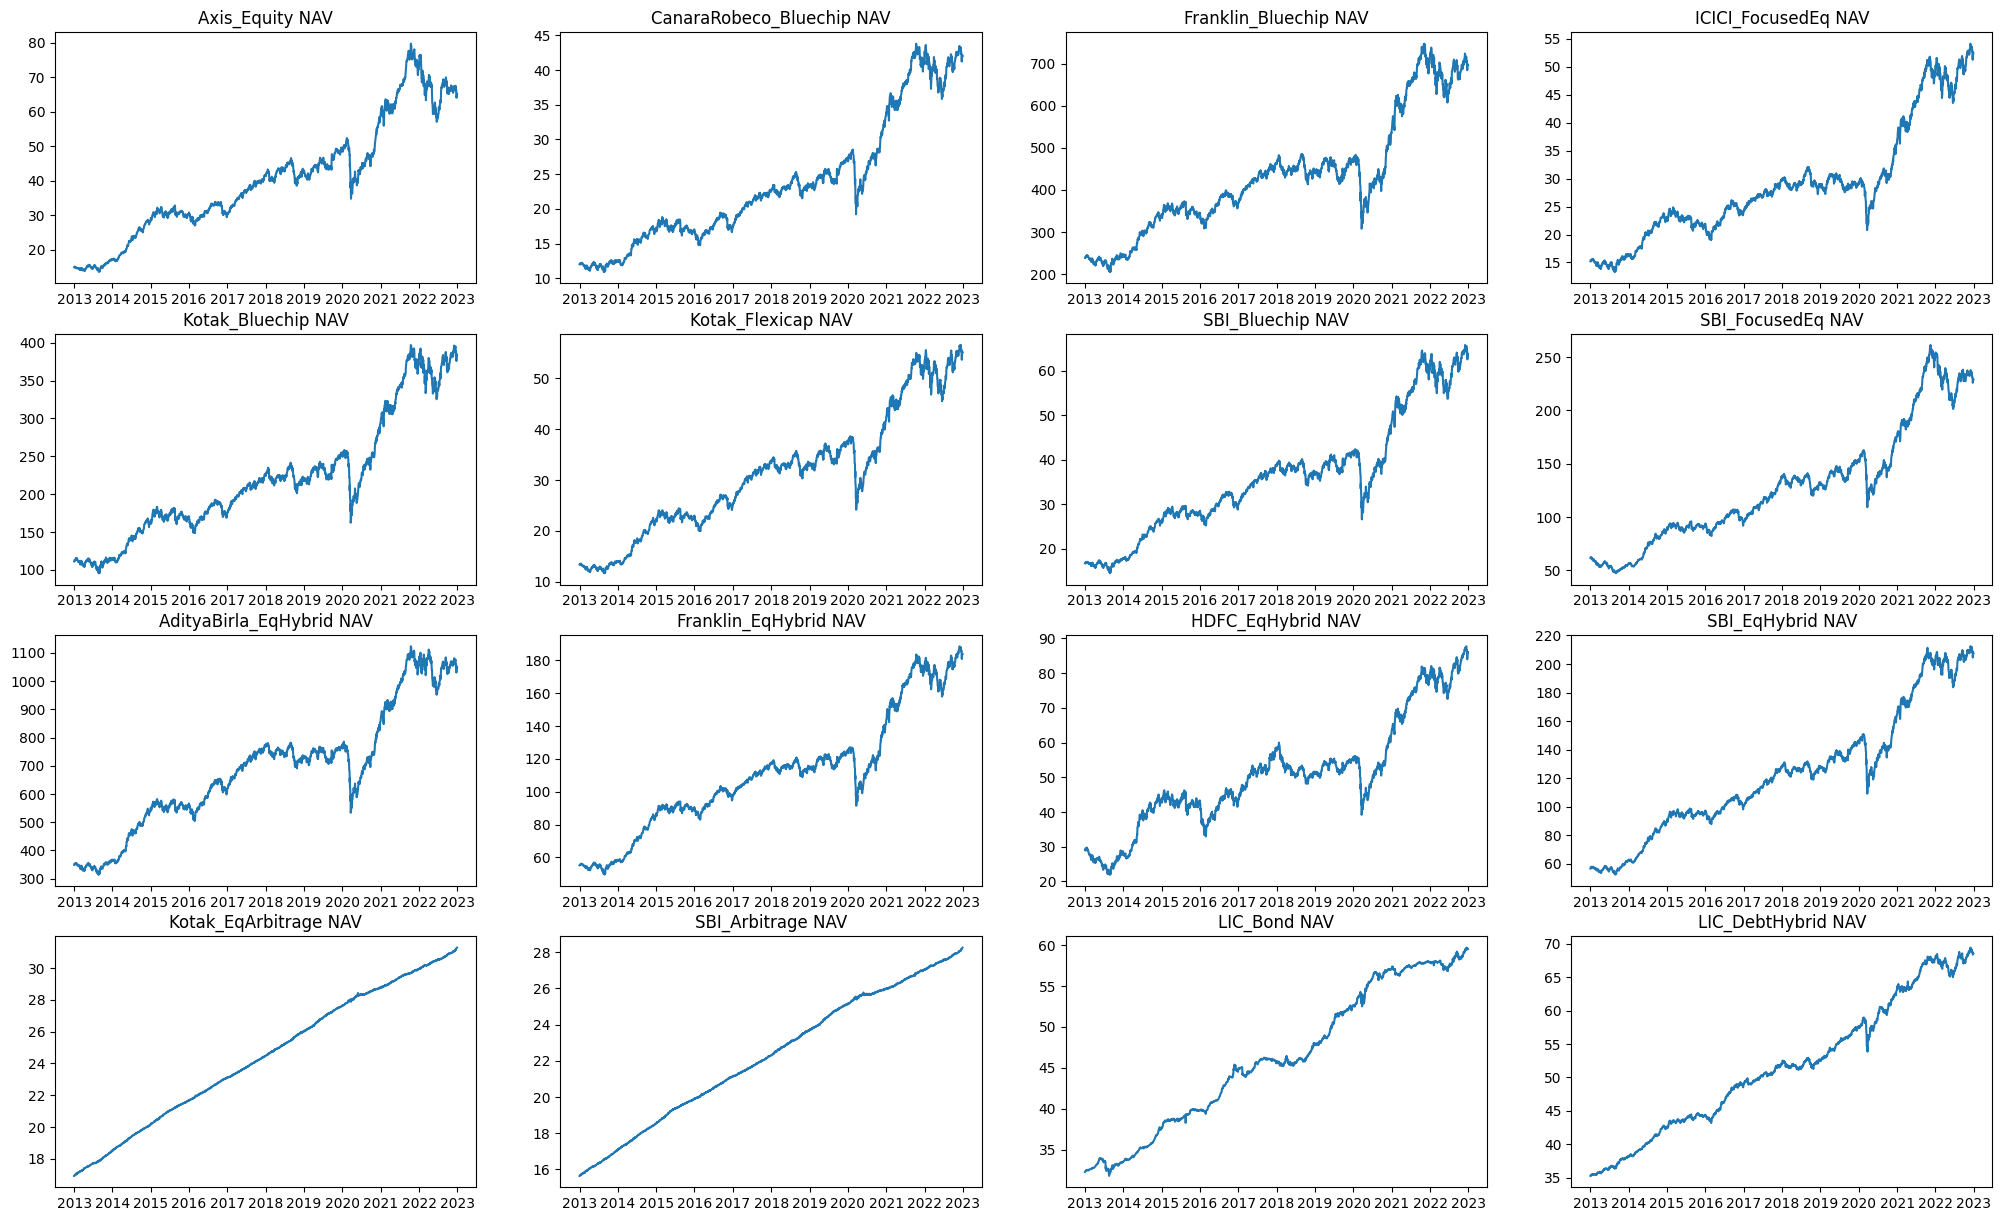

In [ ]:
#create subplots
%matplotlib inline
plt.figure(figsize=(25,15))

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.plot(df[df.columns[i-1]])
    plt.title(df.columns[i-1]+' NAV')

    
plt.show()

1. Calculating Daily Returns for Mutual Fund

In [ ]:
mf_rtn = pd.DataFrame(columns =['Axis_Equity','CanaraRobeco_Bluechip','Franklin_Bluechip','ICICI_FocusedEq','Kotak_Bluechip','Kotak_Flexicap','SBI_Bluechip','SBI_FocusedEq',
                                      'AdityaBirla_EqHybrid','Franklin_EqHybrid','HDFC_EqHybrid','SBI_EqHybrid',
                                      'Kotak_EqArbitrage','SBI_Arbitrage','LIC_Bond','LIC_DebtHybrid'])
for i in range(df.shape[0]):
  rtn = []
  
  for j in range(0,16): #no of columns
    if i == 0:
        rtn.append(0)
        continue
    else:
        rtn.append(round((df.iloc[i,j]-df.iloc[i-1,j])/df.iloc[i-1,j],4))
  #print(rtn)
  mf_rtn.loc[i] = rtn

#Dropping first row
mf_rtn = mf_rtn.drop(0, axis=0)  


In [ ]:
mf_rtn

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
1,0.0074,0.0083,0.0048,0.0086,0.0056,0.0072,0.0060,0.0073,0.0059,0.0021,0.0093,0.0042,0.0017,0.0017,0.0005,0.0010
2,0.0032,0.0017,0.0040,0.0039,0.0035,0.0004,0.0018,0.0094,0.0049,0.0042,0.0030,0.0109,-0.0002,0.0001,0.0009,0.0006
3,-0.0002,0.0008,0.0018,0.0013,0.0051,0.0004,0.0012,0.0002,0.0012,0.0009,0.0022,0.0014,0.0003,-0.0002,0.0010,0.0005
4,-0.0022,-0.0033,-0.0007,-0.0039,0.0001,-0.0018,-0.0041,-0.0022,-0.0017,0.0019,-0.0011,0.0009,0.0005,0.0007,0.0010,0.0005
5,0.0013,0.0008,0.0008,0.0020,0.0010,0.0019,0.0018,-0.0040,0.0000,0.0003,-0.0024,0.0003,-0.0002,-0.0001,0.0000,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,-0.0078,0.0141,-0.0183,-0.0190,-0.0181,-0.0212,-0.0042,-0.0001,-0.0174,-0.0145,-0.0155,-0.0016,0.0006,0.0005,-0.0012,-0.0011
2456,-0.0202,0.0050,0.0117,0.0137,0.0138,0.0164,-0.0177,-0.0146,0.0120,0.0117,0.0145,-0.0137,0.0002,0.0008,0.0006,-0.0034
2457,0.0117,-0.0010,0.0070,0.0067,0.0063,0.0103,0.0138,0.0110,0.0055,0.0042,0.0049,0.0106,0.0006,0.0008,0.0001,0.0019
2458,0.0064,0.0043,-0.0013,-0.0002,-0.0009,-0.0021,0.0066,0.0033,-0.0004,-0.0016,-0.0000,0.0060,0.0005,0.0002,-0.0008,0.0012


2. Calculating Factsheet for 16 Mutual Funds containing Avg Return, Annualised Returns, Std Deviation, Sharpe Ratio


* Higher the Sharpe Ratio, better the performance




In [ ]:
def create_factsheet(data):
  f_s = pd.DataFrame()
  f_s['Daily_Avg_Rtn'] = data.mean()
  f_s['StdDev'] = data.std()
  f_s['Ann_Rtn'] = (data.mean())*246
  f_s['Ann_SD'] = (data.std())*(np.sqrt(246))
  f_s['Sharpe_Ratio'] = ((((data.mean())*246)*100)-6)/(((data.std())*(np.sqrt(246)))*100)

  data1 = f_s.transpose()
  
  return data1

In [ ]:
mf_factsheet = create_factsheet(mf_rtn)
mf_factsheet

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
Daily_Avg_Rtn,0.000652,0.000561,0.000493,0.000555,0.000562,0.000631,0.000600,0.000576,0.000480,0.000517,0.000495,0.000555,0.000251,0.000241,0.000250,0.000273
StdDev,0.010132,0.010198,0.010502,0.009992,0.010545,0.010392,0.010315,0.009020,0.007917,0.007421,0.010298,0.007149,0.000637,0.000684,0.001977,0.002381
Ann_Rtn,0.160415,0.138056,0.121339,0.136515,0.138146,0.155113,0.147540,0.141778,0.118038,0.127242,0.121890,0.136525,0.061685,0.059284,0.061505,0.067127
Ann_SD,0.158919,0.159952,0.164717,0.156723,0.165391,0.162990,0.161780,0.141470,0.124173,0.116393,0.161516,0.112125,0.009998,0.010730,0.031004,0.037344
Sharpe_Ratio,0.631864,0.487998,0.372393,0.488223,0.472493,0.583551,0.541104,0.578056,0.467398,0.577711,0.383180,0.682503,0.168540,-0.066719,0.048543,0.190857


3. Calculating returns and creating factsheet for Index (benchmark)

Index close prices downloaded from NSE: https://www.niftyindices.com/reports/historical-data

Github Link to csv file:


In [ ]:
index_close = 'https://raw.githubusercontent.com/saloniwalimbe/Mutual-Fund-Schemes/main/Indices.csv'

In [ ]:

f1 = urlopen(index_close)
data1 = f1.read()
data1 = data1.decode('utf-8')
data1 = data1.split('\n')

list_for_df1 = []
for line in data1[1:]:
  row = line.split(',')
  if row != '':
    list_for_df1.append(row)

df_i = pd.DataFrame(list_for_df1, columns= ['Date','Nifty_50_Arb','S&P_BSE_100','Nifty_500','Nifty_100','S&P_BSE_500'] )


df_i['Date'] = pd.to_datetime(df_i['Date'], infer_datetime_format=True)
df_i['Nifty_50_Arb'] = pd.to_numeric(df_i['Nifty_50_Arb'])
df_i['S&P_BSE_100'] = pd.to_numeric(df_i['S&P_BSE_100'])
df_i['Nifty_500'] = pd.to_numeric(df_i['Nifty_500'])
df_i['Nifty_100'] = pd.to_numeric(df_i['Nifty_100'])
df_i['S&P_BSE_500'] = pd.to_numeric(df_i['S&P_BSE_500'])



df_i = df_i.set_index('Date')

df_i = df_i.dropna()


In [ ]:
df_i

,Nifty_50_Arb,S&P_BSE_100,Nifty_500,Nifty_100,S&P_BSE_500
Date,,,,,
2013-01-01,1197.90,6029.23,4786.20,5896.90,7650.75
2013-01-02,1199.90,6072.94,4818.90,5938.20,7703.19
2013-01-03,1201.60,6089.22,4835.70,5956.50,7729.66
2013-01-04,1201.40,6095.15,4844.00,5961.20,7742.53
2013-01-07,1201.20,6075.15,4831.40,5939.20,7725.93
...,...,...,...,...,...
2022-12-22,2084.21,18439.26,15431.50,18277.85,24566.74
2022-12-23,2083.20,18076.84,15046.00,17888.05,23955.55
2022-12-26,2086.93,18316.83,15298.55,18134.60,24353.57


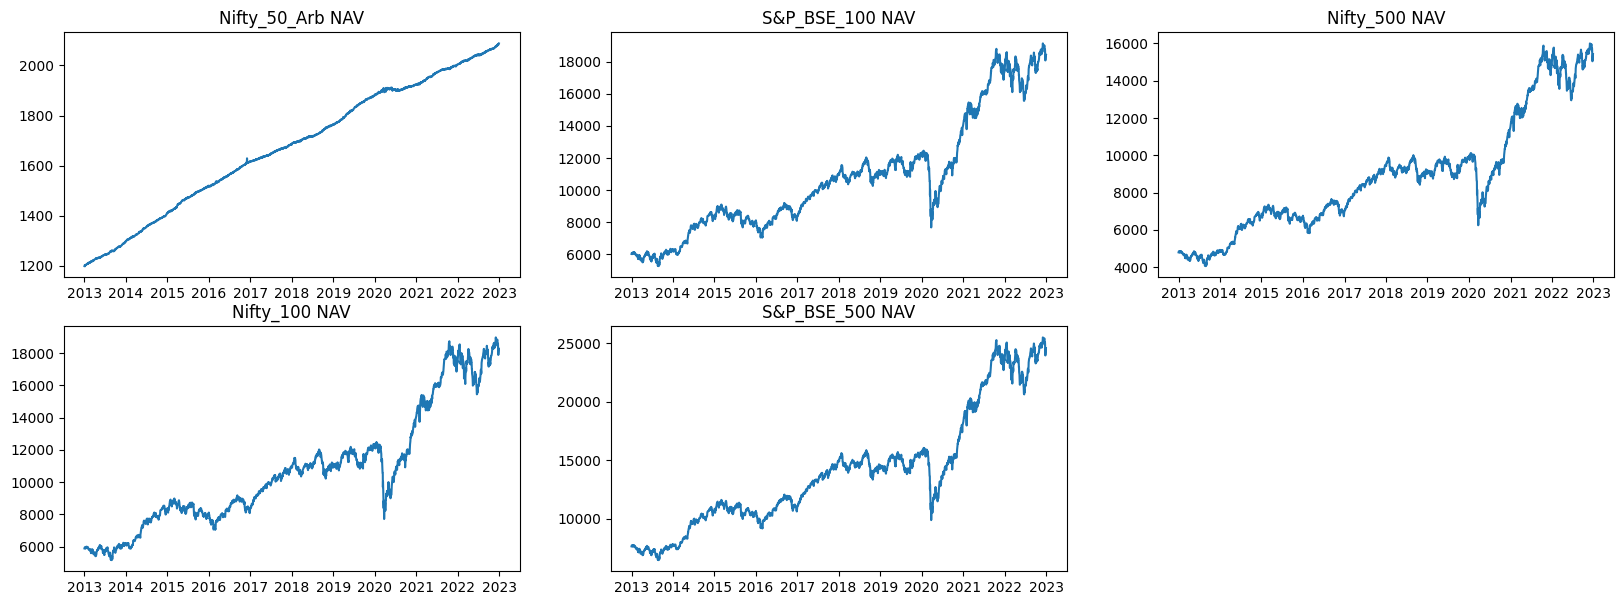

In [ ]:
#create subplots
%matplotlib inline
plt.figure(figsize=(20,7))

for i in range(1,6):
    plt.subplot(2,3,i)
    plt.plot(df_i[df_i.columns[i-1]])
    plt.title(df_i.columns[i-1]+' NAV')
 
plt.show()

In [ ]:
index_rtn = pd.DataFrame(columns =['Nifty_50_Arb','S&P_BSE_100','Nifty_500','Nifty_100','S&P_BSE_500'])
for i in range(df_i.shape[0]):
  rtn = []
  
  for j in range(0,5): #no of columns
    if i == 0:
        rtn.append(0)
        continue
    else:
        rtn.append(round((df_i.iloc[i,j]-df_i.iloc[i-1,j])/df_i.iloc[i-1,j],4))
  #print(rtn)
  index_rtn.loc[i] = rtn

#Dropping first row
index_rtn = index_rtn.drop(0, axis=0) 

In [ ]:
index_rtn

,Nifty_50_Arb,S&P_BSE_100,Nifty_500,Nifty_100,S&P_BSE_500
1,0.0017,0.0072,0.0068,0.0070,0.0069
2,0.0014,0.0027,0.0035,0.0031,0.0034
3,-0.0002,0.0010,0.0017,0.0008,0.0017
4,-0.0002,-0.0033,-0.0026,-0.0037,-0.0021
5,-0.0006,0.0015,0.0013,0.0018,0.0011
...,...,...,...,...,...
2455,0.0013,-0.0047,-0.0062,-0.0045,-0.0063
2456,-0.0005,-0.0197,-0.0250,-0.0213,-0.0249
2457,0.0018,0.0133,0.0168,0.0138,0.0166
2458,0.0003,0.0072,0.0078,0.0071,0.0080


In [ ]:
index_factsheet = create_factsheet(index_rtn)
index_factsheet

,Nifty_50_Arb,S&P_BSE_100,Nifty_500,Nifty_100,S&P_BSE_500
Daily_Avg_Rtn,0.000227,0.000515,0.000533,0.000517,0.000531
StdDev,0.000874,0.010799,0.010635,0.010741,0.010596
Ann_Rtn,0.055843,0.126712,0.131013,0.127232,0.130683
Ann_SD,0.013715,0.169373,0.166796,0.168471,0.166193
Sharpe_Ratio,-0.303117,0.393873,0.425749,0.399070,0.425306


Correlation between mutual fund and respective indices

In [ ]:
cor = []
cor.append(mf_rtn['Axis_Equity'].corr(index_rtn['Nifty_500']))
cor.append(mf_rtn['CanaraRobeco_Bluechip'].corr(index_rtn['S&P_BSE_100']))
cor.append(mf_rtn['Franklin_Bluechip'].corr(index_rtn['Nifty_100']))
cor.append(mf_rtn['ICICI_FocusedEq'].corr(index_rtn['S&P_BSE_500']))
cor.append(mf_rtn['Kotak_Bluechip'].corr(index_rtn['Nifty_100']))
cor.append(mf_rtn['Kotak_Flexicap'].corr(index_rtn['Nifty_500']))
cor.append(mf_rtn['SBI_Bluechip'].corr(index_rtn['S&P_BSE_100']))
cor.append(mf_rtn['SBI_FocusedEq'].corr(index_rtn['S&P_BSE_500']))
cor.append(mf_rtn['AdityaBirla_EqHybrid'].corr(index_rtn['Nifty_100']))
cor.append(mf_rtn['Franklin_EqHybrid'].corr(index_rtn['Nifty_100']))
cor.append(mf_rtn['HDFC_EqHybrid'].corr(index_rtn['Nifty_500']))
cor.append(mf_rtn['SBI_EqHybrid'].corr(index_rtn['Nifty_100']))
cor.append(mf_rtn['Kotak_EqArbitrage'].corr(index_rtn['Nifty_50_Arb']))
cor.append(mf_rtn['SBI_Arbitrage'].corr(index_rtn['Nifty_50_Arb']))
cor.append(mf_rtn['LIC_Bond'].corr(index_rtn['Nifty_500']))
cor.append(mf_rtn['LIC_DebtHybrid'].corr(index_rtn['Nifty_500']))

In [ ]:

mf_factsheet.loc[len(mf_factsheet)] = cor #adding correlation as new row to mutual fund factsheet
mf_factsheet.rename(index = {5:'Correlation'}, inplace = True) #rename index name as correlation

Calculating Beta (volatility of the Mutual Fund)

Beta = (Annualised Risk of Fund/ Anuualised Risk of Index) . Corr(MF, I)


In [ ]:
beta = []
mf_sd = mf_factsheet.iloc[3]
i_sd = index_factsheet.iloc[3]
corr1 = mf_factsheet.iloc[5]

In [ ]:
beta.append((mf_sd['Axis_Equity']/i_sd['Nifty_500'])*(corr1['Axis_Equity']))
beta.append((mf_sd['CanaraRobeco_Bluechip']/i_sd['Nifty_100'])*(corr1['CanaraRobeco_Bluechip']))
beta.append((mf_sd['Franklin_Bluechip']/i_sd['Nifty_100'])*(corr1['Franklin_Bluechip']))
beta.append((mf_sd['ICICI_FocusedEq']/i_sd['Nifty_500'])*(corr1['ICICI_FocusedEq']))
beta.append((mf_sd['Kotak_Bluechip']/i_sd['Nifty_100'])*(corr1['Kotak_Bluechip']))
beta.append((mf_sd['Kotak_Flexicap']/i_sd['Nifty_500'])*(corr1['Kotak_Flexicap']))
beta.append((mf_sd['SBI_Bluechip']/i_sd['S&P_BSE_100'])*(corr1['SBI_Bluechip']))
beta.append((mf_sd['SBI_FocusedEq']/i_sd['S&P_BSE_500'])*(corr1['SBI_FocusedEq']))
beta.append((mf_sd['AdityaBirla_EqHybrid']/i_sd['Nifty_500'])*(corr1['AdityaBirla_EqHybrid']))
beta.append((mf_sd['Franklin_EqHybrid']/i_sd['Nifty_100'])*(corr1['Franklin_EqHybrid']))
beta.append((mf_sd['HDFC_EqHybrid']/i_sd['Nifty_100'])*(corr1['HDFC_EqHybrid']))
beta.append((mf_sd['SBI_EqHybrid']/i_sd['Nifty_100'])*(corr1['SBI_EqHybrid']))
beta.append((mf_sd['Kotak_EqArbitrage']/i_sd['Nifty_50_Arb'])*(corr1['Kotak_EqArbitrage']))
beta.append((mf_sd['SBI_Arbitrage']/i_sd['Nifty_50_Arb'])*(corr1['SBI_Arbitrage']))
beta.append((mf_sd['LIC_Bond']/i_sd['Nifty_500'])*(corr1['LIC_Bond']))
beta.append((mf_sd['LIC_DebtHybrid']/i_sd['Nifty_500'])*(corr1['LIC_DebtHybrid']))

In [ ]:
mf_factsheet.loc[len(mf_factsheet)] = beta #adding beta as new row to mutual fund factsheet
mf_factsheet.rename(index = {6:'Beta'}, inplace = True) #rename index name as beta

In [ ]:
mf_factsheet

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
Daily_Avg_Rtn,0.000652,0.000561,0.000493,0.000555,0.000562,0.000631,0.000600,0.000576,0.000480,0.000517,0.000495,0.000555,0.000251,0.000241,0.000250,0.000273
StdDev,0.010132,0.010198,0.010502,0.009992,0.010545,0.010392,0.010315,0.009020,0.007917,0.007421,0.010298,0.007149,0.000637,0.000684,0.001977,0.002381
Ann_Rtn,0.160415,0.138056,0.121339,0.136515,0.138146,0.155113,0.147540,0.141778,0.118038,0.127242,0.121890,0.136525,0.061685,0.059284,0.061505,0.067127
Ann_SD,0.158919,0.159952,0.164717,0.156723,0.165391,0.162990,0.161780,0.141470,0.124173,0.116393,0.161516,0.112125,0.009998,0.010730,0.031004,0.037344
Sharpe_Ratio,0.631864,0.487998,0.372393,0.488223,0.472493,0.583551,0.541104,0.578056,0.467398,0.577711,0.383180,0.682503,0.168540,-0.066719,0.048543,0.190857
Correlation,0.935626,0.014677,0.052021,0.035340,0.058415,0.066161,0.975647,0.877422,0.073486,0.073522,0.086221,0.936271,-0.014517,0.637778,0.133290,0.756130
Beta,0.891439,0.013934,0.050862,0.033205,0.057347,0.064651,0.931909,0.746895,0.054707,0.050795,0.082662,0.623129,-0.010582,0.498970,0.024776,0.169288


### calculating returns for future with predicted data

In [ ]:
nav_pred = 'https://raw.githubusercontent.com/saloniwalimbe/Mutual-Fund-Schemes/main/NAV_Prediction%20v1.csv'

In [ ]:
import pandas as pd
import math
import datetime
from urllib.request import urlopen
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')     

In [ ]:

f1 = urlopen(nav_pred)
data1 = f1.read()
data1 = data1.decode('utf-8')
data1 = data1.split('\n')

list_for_df1 = []
for line in data1[1:]:
  row = line.split(',')
  if row != '':
    list_for_df1.append(row)

df1 = pd.DataFrame(list_for_df1, columns= ['Axis_Equity','CanaraRobeco_Bluechip','Franklin_Bluechip','ICICI_FocusedEq','Kotak_Bluechip','Kotak_Flexicap','SBI_Bluechip','SBI_FocusedEq',
                                         'AdityaBirla_EqHybrid','Franklin_EqHybrid','HDFC_EqHybrid','SBI_EqHybrid',
                                         'Kotak_EqArbitrage','SBI_Arbitrage','LIC_Bond','LIC_DebtHybrid'
                                        ]
                 )


df1['Axis_Equity'] = pd.to_numeric(df1['Axis_Equity'])
df1['CanaraRobeco_Bluechip'] = pd.to_numeric(df1['CanaraRobeco_Bluechip'])
df1['Franklin_Bluechip'] = pd.to_numeric(df1['Franklin_Bluechip'])
df1['ICICI_FocusedEq'] = pd.to_numeric(df1['ICICI_FocusedEq'])
df1['Kotak_Bluechip'] = pd.to_numeric(df1['Kotak_Bluechip'])
df1['Kotak_Flexicap'] = pd.to_numeric(df1['Kotak_Flexicap'])
df1['SBI_Bluechip'] = pd.to_numeric(df1['SBI_Bluechip'], errors = "ignore")
df1['SBI_FocusedEq'] = pd.to_numeric(df1['SBI_FocusedEq'], errors = "ignore")
df1['AdityaBirla_EqHybrid'] = pd.to_numeric(df1['AdityaBirla_EqHybrid'], errors = "ignore")
df1['Franklin_EqHybrid'] = pd.to_numeric(df1['Franklin_EqHybrid'], errors = "ignore")
df1['HDFC_EqHybrid'] = pd.to_numeric(df1['HDFC_EqHybrid'], errors = "ignore")
df1['SBI_EqHybrid'] = pd.to_numeric(df1['SBI_EqHybrid'], errors = "ignore")
df1['Kotak_EqArbitrage'] = pd.to_numeric(df1['Kotak_EqArbitrage'], errors = "ignore")
df1['SBI_Arbitrage'] = pd.to_numeric(df1['SBI_Arbitrage'], errors = "ignore")
df1['LIC_Bond'] = pd.to_numeric(df1['LIC_Bond'], errors = "ignore")
df1['LIC_DebtHybrid'] = pd.to_numeric(df1['LIC_DebtHybrid'], errors = "ignore")


df1 = df1.dropna()



In [ ]:
df1

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
0,65.499292,40.466944,707.181993,52.437329,382.584426,52.862057,60.680665,233.049779,1042.510618,181.274603,81.010781,208.182202,30.786908,27.880723,59.374887,67.780492
1,65.401342,40.395398,705.936632,52.349742,381.868872,52.758925,60.597070,232.655238,1040.843983,181.024078,80.902709,207.961167,30.793073,27.886847,59.384727,67.751853
2,65.306210,40.310157,704.955610,52.271901,381.192319,52.635455,60.490574,232.325900,1039.200192,180.758058,80.755212,207.759871,30.795396,27.890328,59.391365,67.716118
3,65.215548,40.210331,704.236726,52.203205,380.555268,52.490656,60.360172,232.068053,1037.582089,180.476261,80.567553,207.580400,30.793534,27.890807,59.394936,67.673444
4,65.129826,40.097181,703.752004,52.142425,379.954381,52.326431,60.207134,231.879234,1035.990107,180.180312,80.343050,207.421735,30.787634,27.888287,59.395743,67.624689
5,65.048895,39.972936,703.461856,52.088102,379.384409,52.146134,60.034135,231.751459,1034.422513,179.872605,80.087104,207.281170,30.778137,27.883003,59.394204,67.570985
6,64.972261,39.840145,703.324496,52.038803,378.839929,51.953558,59.844625,231.674776,1032.876510,179.556000,79.805857,207.155458,30.765625,27.875323,59.390768,67.513538
7,64.899316,39.701230,703.301468,51.993281,378.315515,51.752405,59.642339,231.638826,1031.349543,179.233204,79.505464,207.041244,30.750714,27.865655,59.385856,67.453398
8,64.829453,39.558310,703.359879,51.950468,377.806910,51.545911,59.430805,231.633787,1029.839156,178.906573,79.191446,206.935652,30.733980,27.854419,59.379853,67.391528
9,64.762108,39.413107,703.473370,51.909567,377.310269,51.336730,59.213304,231.651519,1028.342891,178.578184,78.868618,206.836118,30.715940,27.841998,59.373072,67.328673


In [ ]:
from datetime import datetime, timedelta
dt = pd.to_datetime('2022-12-28')
td = []
for i in range(1,21):
  tdi = timedelta(days=i)
  td.append(dt+tdi)
  i=i+1

td = pd.to_datetime(td)
df1 = df1.set_index(td)

In [ ]:
total_nav = df.append(df1)
total_nav

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
2013-01-01,14.914900,12.020000,238.344400,15.200000,111.103000,13.381000,16.720000,61.460000,348.920000,55.153300,28.957000,56.720000,16.936100,15.646700,32.250200,35.293400
2013-01-02,15.025100,12.120000,239.481900,15.330000,111.730000,13.478000,16.820000,61.910000,350.970000,55.269700,29.227000,56.960000,16.965200,15.673000,32.267800,35.329000
2013-01-03,15.073200,12.140000,240.449500,15.390000,112.126000,13.483000,16.850000,62.490000,352.690000,55.501200,29.316000,57.580000,16.961000,15.675200,32.297000,35.349700
2013-01-04,15.069500,12.150000,240.885300,15.410000,112.697000,13.488000,16.870000,62.500000,353.100000,55.551300,29.381000,57.660000,16.965800,15.672500,32.329600,35.366000
2013-01-07,15.037000,12.110000,240.714100,15.350000,112.706000,13.464000,16.800000,62.360000,352.500000,55.657600,29.348000,57.710000,16.974200,15.682900,32.361900,35.382600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,64.390077,38.547795,704.526259,51.680222,374.471873,50.107760,57.903602,231.946044,1019.594223,176.636855,76.917838,206.291484,30.598392,27.757426,59.326608,66.954710
2023-01-14,64.331389,38.408609,704.707508,51.642988,374.014070,49.913351,57.695603,232.002073,1018.169093,176.323240,76.605898,206.203831,30.578893,27.743126,59.318766,66.894800
2023-01-15,64.273352,38.271216,704.886073,51.605899,373.559897,49.722368,57.491788,232.057388,1016.752879,176.012957,76.299609,206.116605,30.559625,27.728969,59.310993,66.835790
2023-01-16,64.215934,38.135575,705.062050,51.568954,373.109442,49.534772,57.292205,232.111720,1015.346112,175.705905,75.999102,206.029847,30.540609,27.714981,59.303301,66.777672


In [ ]:
new_rtn

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
1,0.0074,0.0083,0.0048,0.0086,0.0056,0.0072,0.0060,0.0073,0.0059,0.0021,0.0093,0.0042,0.0017,0.0017,0.0005,0.0010
2,0.0032,0.0017,0.0040,0.0039,0.0035,0.0004,0.0018,0.0094,0.0049,0.0042,0.0030,0.0109,-0.0002,0.0001,0.0009,0.0006
3,-0.0002,0.0008,0.0018,0.0013,0.0051,0.0004,0.0012,0.0002,0.0012,0.0009,0.0022,0.0014,0.0003,-0.0002,0.0010,0.0005
4,-0.0022,-0.0033,-0.0007,-0.0039,0.0001,-0.0018,-0.0041,-0.0022,-0.0017,0.0019,-0.0011,0.0009,0.0005,0.0007,0.0010,0.0005
5,0.0013,0.0008,0.0008,0.0020,0.0010,0.0019,0.0018,-0.0040,0.0000,0.0003,-0.0024,0.0003,-0.0002,-0.0001,0.0000,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,-0.0009,-0.0036,0.0003,-0.0007,-0.0012,-0.0039,-0.0036,0.0002,-0.0014,-0.0018,-0.0041,-0.0004,-0.0006,-0.0005,-0.0001,-0.0009
2476,-0.0009,-0.0036,0.0003,-0.0007,-0.0012,-0.0039,-0.0036,0.0002,-0.0014,-0.0018,-0.0041,-0.0004,-0.0006,-0.0005,-0.0001,-0.0009
2477,-0.0009,-0.0036,0.0003,-0.0007,-0.0012,-0.0038,-0.0035,0.0002,-0.0014,-0.0018,-0.0040,-0.0004,-0.0006,-0.0005,-0.0001,-0.0009
2478,-0.0009,-0.0035,0.0002,-0.0007,-0.0012,-0.0038,-0.0035,0.0002,-0.0014,-0.0017,-0.0039,-0.0004,-0.0006,-0.0005,-0.0001,-0.0009
